# Lab 1 - Visualizing Data

---

**Course:** MATH 2310  
**Author:** Jakob Balkovec  
**Instructor:** G. Egan  
**Date:** Tue, Apr 2nd 2024  

---


In [38]:
"""_summary_
Course: MATH 2310
Author: Jakob Balkovec
Instructor: G. Egan

File: lab1.ipynb

Brief: Data Visualization in Python/R

Env: Python 3.11.2 64-bit

Condoning to pep8 formatting standards.
"""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data transformation
import numpy as np

from scipy.stats import boxcox

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer



ACTIVITY_ONE = r"/Users/jbalkovec/Desktop/MATH2310/Labs/Lab1/Snowgeese.xls"
ACTIVITY_TWO = r"/Users/jbalkovec/Desktop/MATH2310/Labs/Lab1/clouds.xlsx"

The code block establishes file paths for two datasets stored as `.xls` files, named `ACTIVITY_ONE` and `ACTIVITY_TWO`, with the aim of enhancing readability. Additionally, it imports some essential libraries used to visualize data, such as `matplotlib`, `pandas`, `numpy`, and `seaborn`.

In [4]:
def read_data_frame(filename: str) -> pd.DataFrame:
  """
    _brief_:
      - Reads an Excel file and returns its contents as a pandas DataFrame.

    _param_: filename (str): The path to the Excel file to be read.
    _pre_: The input file must be an Excel file.
    _return_: pandas.DataFrame: A DataFrame containing the contents of the Excel file.
  """
  try:
    if filename.endswith(".xls") or filename.endswith(".xlsx"):
      return pd.read_excel(filename)
    else:
      raise ValueError("The input file must be an Excel file.")
  except ValueError as file_extension_error:
    print("[ERROR]: File error, check extension.")

In [5]:
def plot_histogram(data_frame: pd.DataFrame, 
                   column_name: str, 
                   bin_count: int, 
                   title: str, 
                   plot_color: str, 
                   plot_figsize: tuple = (8,6)) -> None:
    """
    _brief_:
      - Plot a histogram to visualize the distribution of data in a specified column of a DataFrame.

    _param_:
        - data_frame (pd.DataFrame): The DataFrame containing the data to be plotted.
        - column_name (str): The name of the column in the DataFrame to be plotted.
        - bin_count (int): The number of bins to divide the data into for the histogram.
        - title (str): The title of the histogram plot.
        - plot_color (str): The color of the histogram bars.
        - plot_figsize (tuple, optional): The size of the plot figure in inches. Default is (8,6).

    _pre_:
        - The DataFrame must contain valid data.
        - column_name must be a valid column in the DataFrame.
        - bin_count must be a positive integer.
        - plot_color must be a valid color name or hex code.

    _post_:
        - A histogram of the specified column will be displayed.
    """
    plt.figure(figsize=plot_figsize)
    sns.histplot(data_frame[column_name], bins=bin_count, color=plot_color, edgecolor='black', kde=True)
    plt.title(title, fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [6]:
def plot_histogram_subplot(data_frame: pd.DataFrame, 
                           column_name: str, 
                           bin_count: int, 
                           title: str, 
                           plot_color: str, 
                           subplot_layout: tuple,
                           x_axis_limits: tuple,
                           plot_figsize: tuple = (8,6),
                           ) -> None:
    """
    _brief_: Plot a histogram to visualize the distribution of data in a specified column of a DataFrame.

    _param_:
        - data_frame (pd.DataFrame): The DataFrame containing the data to be plotted.
        - column_name (str): The name of the column in the DataFrame to be plotted.
        - bin_count (int): The number of bins to divide the data into for the histogram.
        - title (str): The title of the histogram plot.
        - plot_color (str): The color of the histogram bars.
        - subplot_layout (tuple): A tuple specifying the layout of subplots (rows, columns, index).
        - plot_figsize (tuple, optional): The size of the plot figure in inches. Default is (8,6).

    _pre_:
        - The DataFrame must contain valid data.
        - column_name must be a valid column in the DataFrame.
        - bin_count must be a positive integer.
        - plot_color must be a valid color name or hex code.

    _post_:
        - A histogram of the specified column will be displayed as a subplot.
    """
    plt.figure(figsize=plot_figsize)
    plt.subplot(*subplot_layout)
    sns.histplot(data_frame[column_name], bins=bin_count, color=plot_color, edgecolor='black', kde=True)
    plt.title(title, fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlim(x_axis_limits)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### Utility Functions

All of the above defined function were created to enhance readability and streamline the notebook's content.

- `read_data_frame()` function reads an `.xls` file and returns its contents as a Pandas DataFrame. It takes the filename as input and ensures the input file is an Excel file. The function returns a DataFrame containing the file contents.

- `plot_histogram()` function visualizes the distribution of data in a specified DataFrame column using a histogram. It accepts parameters like DataFrame, column name, bin count, title, and plot color. Optional parameters include plot figure size.

- `plot_histogram_subplot()` function creates a histogram subplot to visualize data distribution in a DataFrame column. It offers customization options like bin count, title, color, subplot layout, and x-axis limits.

## Activity One (Snow geese)

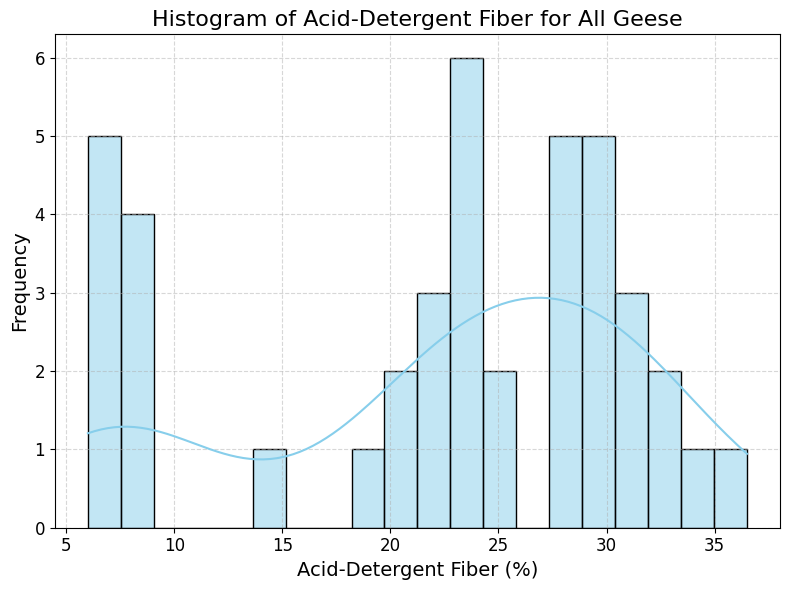

In [15]:
# Read the snowgeese data into a pandas DataFrame
geese_data_frame = read_data_frame(ACTIVITY_ONE)

# Set column names for the data frame
geese_data_frame.columns = ['Trial', 'Diet', 'Weight Change (%)', 'Digestion Efficiency (%)', 'Acid-Detergent Fiber (%)']

plot_histogram(data_frame=geese_data_frame, 
               column_name='Acid-Detergent Fiber (%)', 
               bin_count=20, 
               title='Histogram of Acid-Detergent Fiber for All Geese', 
               plot_color='skyblue')

### You should notice a very bimodal histogram. Why is this?

The bimodality of the histogram is likely due to the "different dietary compositions" between **plant-fed** and **chow-fed** Snow geese. Plant-fed geese show a exhibit acid detergent fiber percentage compared to chow-fed geese, as evident in the dataset (`Snowgeese.xls`). This significant difference in acid-detergent fiber percentage between the two groups is likely the cause for the observed bimodality in the histogram.

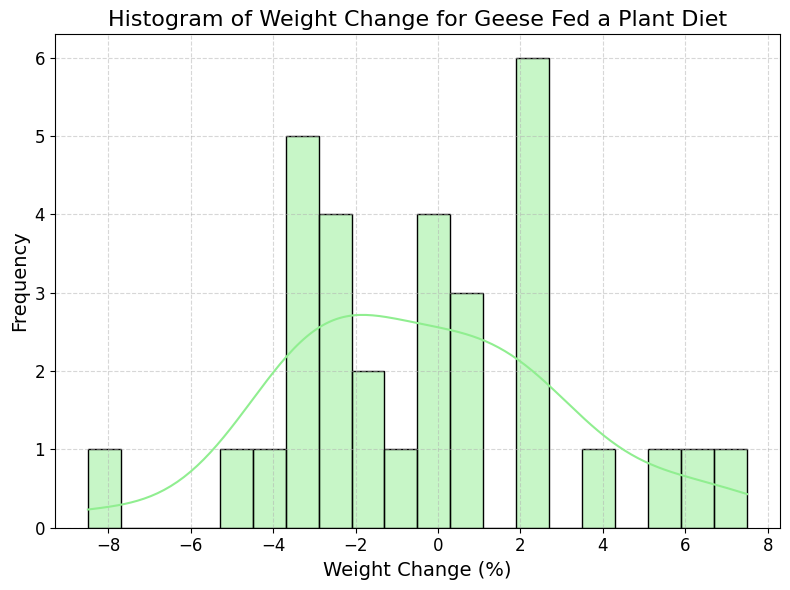

In [21]:
# [B] Histogram of weight change values for geese fed a plant diet
plant_diet_data_frame = geese_data_frame[geese_data_frame['Diet'] == 'Plants']

# print(plant_diet_data_frame)

plot_histogram(data_frame=plant_diet_data_frame, 
               column_name='Weight Change (%)', 
               bin_count=20, 
               title='Histogram of Weight Change for Geese Fed a Plant Diet', 
               plot_color='lightgreen')

### Describe the shape of the histogram in one or two sentence.

The `seabron` function `sns.histplot()` has an optional attribute/parameter called `kda` or kernel density estimation. This neat feature helps with determining the shape or skewness of the histogram. In my case, the kernel density estimation hints the histogram is unimodal and right skewed. 

### In one or two sentences, discuss what the histogram tells us about how many of the geese tend to lose weight, gain weight, or stay at about the same weight.

The unimodality in the graph indicates that most of the geese maintained their weight, with a smaller proportion experiencing either weight loss or gain. Since the histogram is right skewed, it suggests that the **majority** of Snow geese in the sample either maintained or lost weight.

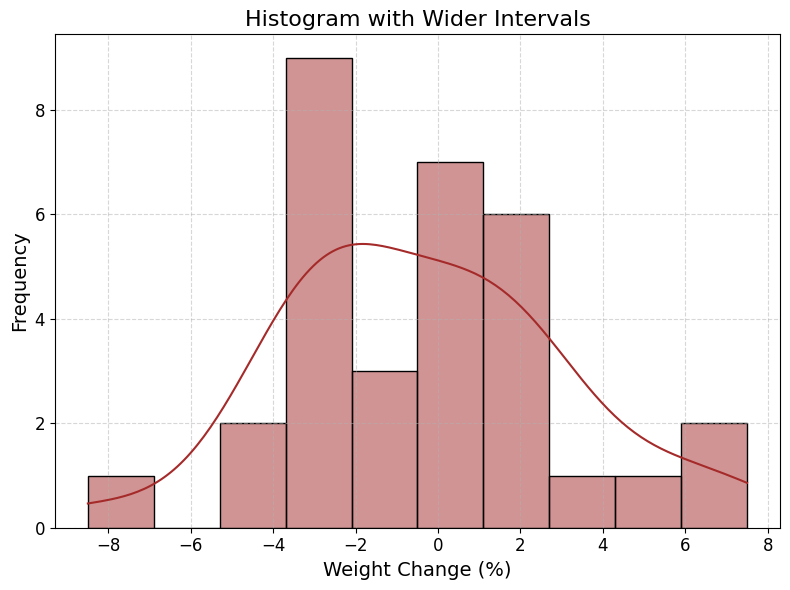

In [20]:
# [C] Histograms with different interval widths

# Wider intervals
plot_histogram(data_frame=plant_diet_data_frame,
               column_name='Weight Change (%)',
               bin_count=10,
               title='Histogram with Wider Intervals',
               plot_color='brown')

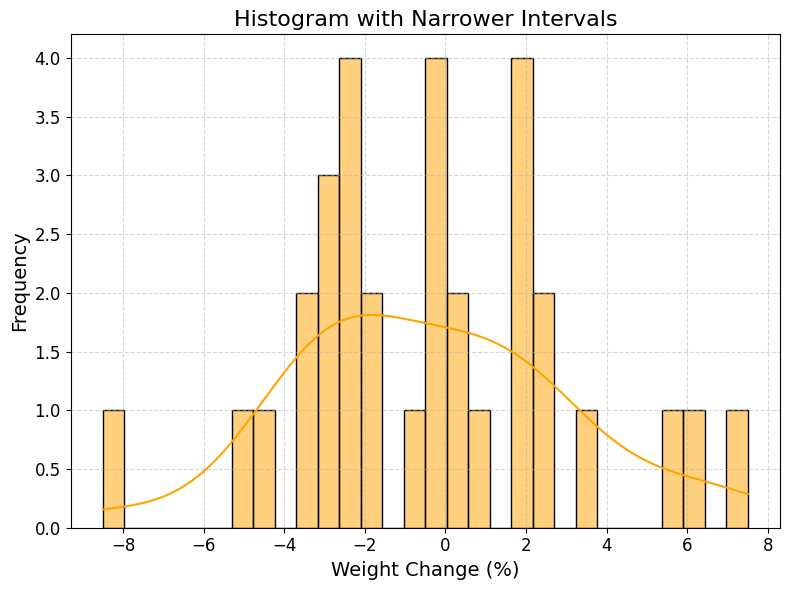

In [10]:
# [C] Histograms with different interval widths

# Narrower intervals
plot_histogram(data_frame=plant_diet_data_frame,
                column_name='Weight Change (%)',
                bin_count=30,
                title='Histogram with Narrower Intervals',
                plot_color='orange')

### In one or two sentences, explain which one of the three histograms you feel gives you the most useful summary of the data? Why?

The histogram with the bin count of 30 (`bin_count=30`) may offer greater granularity, but it could make the data harder to understand by splitting it up too much, without giving us much more useful information.

On the other hand, the histogram with the bin count of 10 (`bin_count=10`) might oversimplify the data, potentially missing important details and trends.

In my opinion, the **original histogram** with a bin count of 20 (`bin_count=20`) is the best representation of the provided data. It strikes the balance between oversimplification and excessive detail, allowing for a clear representation of the data without overwhelming complexity.

# Activity Two (Clouds)

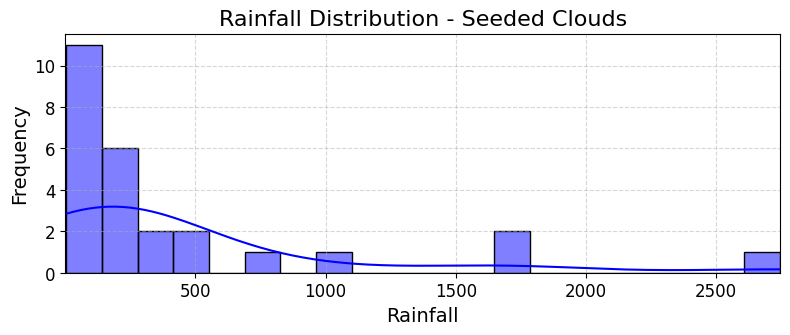

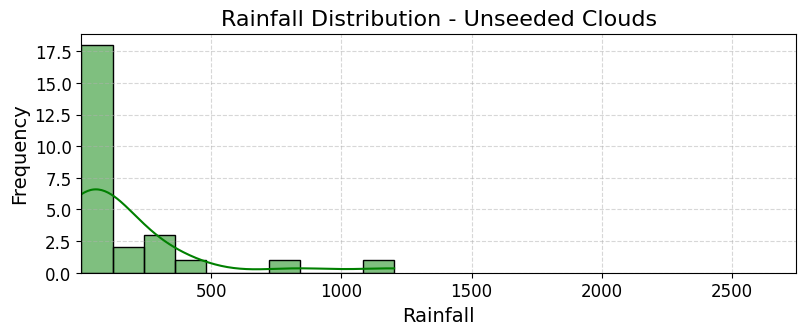

In [29]:
clouds_data_frame = read_data_frame(ACTIVITY_TWO)

# print(clouds_data_frame)

# Set X-axis limits for both histograms
max_rainfall = clouds_data_frame['Rainfall'].max()
min_rainfall = clouds_data_frame['Rainfall'].min()

x_axis_limits = (min_rainfall, max_rainfall)

# Seeded clouds histogram
subplot_layout_seeded = (2, 1, 1)
plot_histogram_subplot(data_frame=clouds_data_frame[clouds_data_frame['Treatment'] == 'Seeded'], 
                       column_name='Rainfall', 
                       bin_count=20, 
                       title='Rainfall Distribution - Seeded Clouds', 
                       plot_color='blue', 
                       subplot_layout=subplot_layout_seeded,
                       x_axis_limits=x_axis_limits)

# Unseeded clouds histogram
subplot_layout_unseeded = (2, 1, 2)
plot_histogram_subplot(data_frame=clouds_data_frame[clouds_data_frame['Treatment'] == 'Unseeded'], 
                       column_name='Rainfall', 
                       bin_count=10, 
                       title='Rainfall Distribution - Unseeded Clouds', 
                       plot_color='green', 
                       subplot_layout=subplot_layout_unseeded,
                       x_axis_limits=x_axis_limits)


### Based on this pair of histograms, write one or two sentences discussing what you can tell about how cloud seeding impacts rainfall.

Based on these histograms, it seems cloud seeding affects rainfall significantly. The one for seeded clouds shows more rainfall than the unseeded clouds, suggesting cloud seeding may increase rainfall. Additionally, most unseeded clouds produce small amounts of rain often, while seeded clouds tend to produce larger amounts.

In [49]:
# Apply transformations to the rainfall data

# Log transformation
clouds_data_frame['Log_Rainfall'] = np.log(clouds_data_frame['Rainfall'])

# Sqrt transformation
clouds_data_frame['Square_Root_Rainfall'] = np.sqrt(clouds_data_frame['Rainfall'])

# Inverse transformation
clouds_data_frame['Inverse_Rainfall'] = 1 / clouds_data_frame['Rainfall']

# Box-Cox transformation
clouds_data_frame['Boxcox_Rainfall'], _ = boxcox(clouds_data_frame['Rainfall'])

# --- Just out of curiosity ---
# link: https://scikit-learn.org/stable/data_transforms.html

# Standard Scaling
# standard_scaler = StandardScaler()
# clouds_data_frame['Standard_Scaled_Rainfall'] = standard_scaler.fit_transform(clouds_data_frame[['Rainfall']])

# # Robust Scaling
# robust_scaler = RobustScaler()
# clouds_data_frame['Robust_Scaled_Rainfall'] = robust_scaler.fit_transform(clouds_data_frame[['Rainfall']])

# # Quantile Transformation
# quantile_transformer = QuantileTransformer()
# clouds_data_frame['Quantile_Transformed_Rainfall'] = quantile_transformer.fit_transform(clouds_data_frame[['Rainfall']])




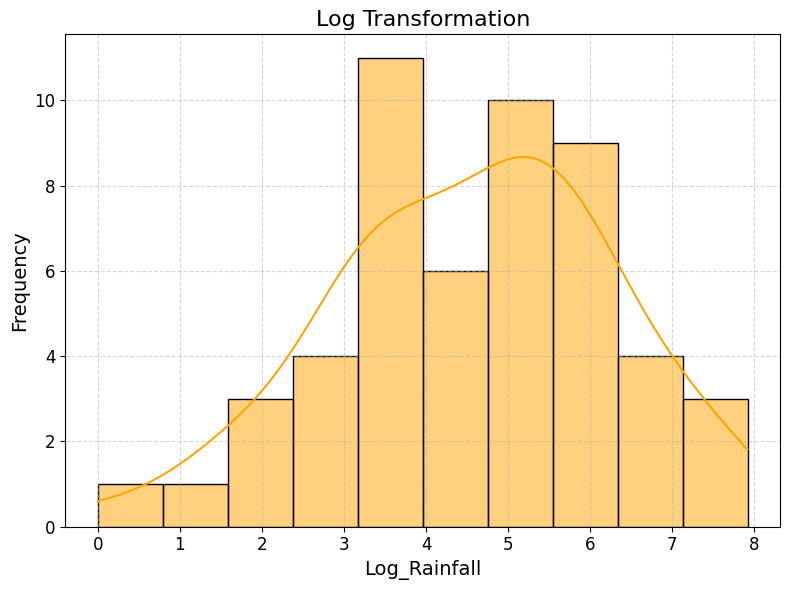

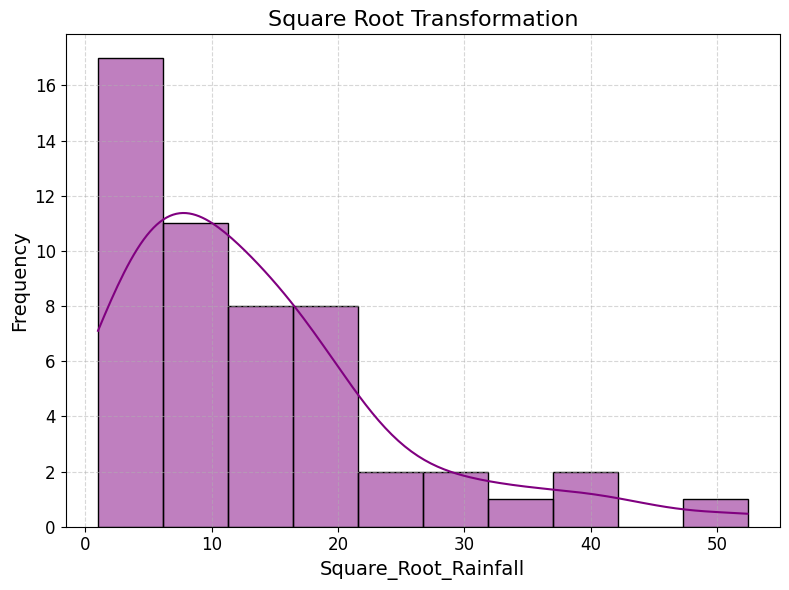

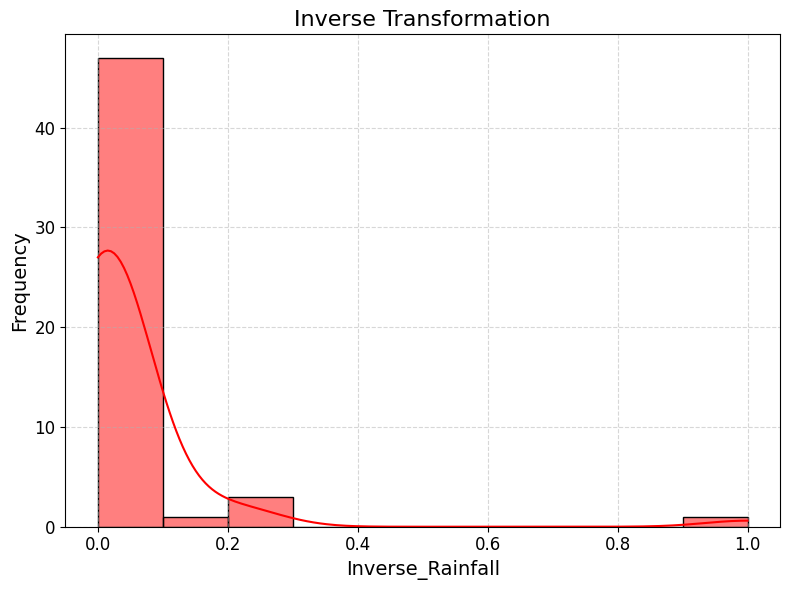

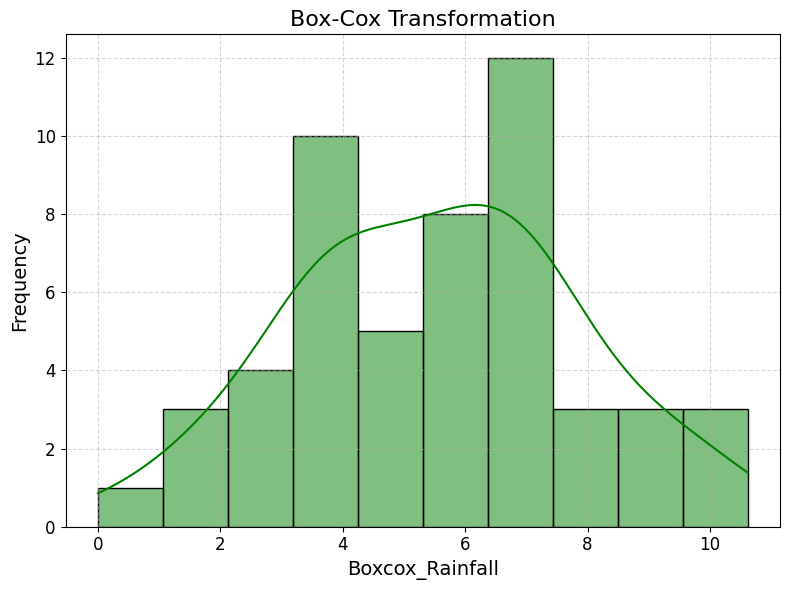

In [50]:
plot_histogram(clouds_data_frame, 'Log_Rainfall', 10, 'Log Transformation', 'orange')
plot_histogram(clouds_data_frame, 'Square_Root_Rainfall', 10, 'Square Root Transformation', 'purple')
plot_histogram(clouds_data_frame, 'Inverse_Rainfall', 10, 'Inverse Transformation', 'red')
plot_histogram(clouds_data_frame, 'Boxcox_Rainfall', 10, 'Box-Cox Transformation', 'green')

# plot_histogram(clouds_data_frame, 'Standard_Scaled_Rainfall', 10, 'Standard Scaling', 'blue')
# plot_histogram(clouds_data_frame, 'Robust_Scaled_Rainfall', 10, 'Robust Scaling', 'brown')
# plot_histogram(clouds_data_frame, 'Quantile_Transformed_Rainfall', 10, 'Quantile Transformation', 'pink')

### Of the three transformations you considered, which one gave the most symmetric histograms?

In my view, both the log transformation and the Box-Cox transformation result in the most symmetric histograms. By looking at the `kda`, we notice a single mode with only slight skewness in comparison to the other histograms.